# 자연어 처리

# 1. 토크나이징

In [ ]:
# 테스트 코드
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [ ]:
from konlpy.tag import Okt  # Okt, Kkma

okt = Okt()
kkma = Kkma()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text)
result2 = kkma.pos(text)

for res in result :
    print(res)

print("="*33)

for res in result2 :
    print(res)

# print(result)
# print(result2)

('분명', 'Noun')
('배달', 'Noun')
('이', 'Josa')
('완료', 'Noun')
('되었는데', 'Verb')
('나', 'Noun')
('는', 'Josa')
('받지', 'Verb')
('않았어', 'Verb')
('분명', 'MAG')
('배달', 'NNG')
('이', 'JKS')
('완료', 'NNG')
('되', 'XSV')
('었', 'EPT')
('는데', 'ECD')
('나', 'NP')
('는', 'JX')
('받', 'VV')
('지', 'ECD')
('않', 'VXV')
('았', 'EPT')
('어', 'EFN')


In [10]:
from konlpy.tag import Okt  # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result1 = okt.pos(text)   # pos, morphs, nouns
result2 = okt.morphs(text)
result3 = okt.nouns(text)

print(result1)
print(result2)
print(result3)


[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb')]
['분명', '배달', '이', '완료', '되었는데', '나', '는', '받지', '않았어']
['분명', '배달', '완료', '나']


In [17]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ"
text2 = "나는 밥을 먹었다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm=True)     # norm : 표준어로 변경해주는 옵션
result3 = okt.pos(text2, stem=True)     # stem : 과거형 -> 현재형 (같은)

print(result1)
print(result2)
print(result3)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb')]


## 1) 데이터 불러오기

In [33]:
# 데이터 불러오기

import pandas as pd

data = pd.read_csv("data/배달의민족댓글.csv", index_col=0)
data.head()

,댓글
0,NaN
1,NaN
2,NaN
3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...


In [ ]:
# 방법1. 데이터를 인덱스 3부터 끝까지 가져오기
# data1 = data.iloc[3:, :]  # 인덱스가 3부터 시작하는게 거슬림 -> reset_index(drop=True) 해줌
data1 = data.iloc[3:, :].reset_index(drop=True)
data1.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [37]:
# 방법2. 결측치 제거
data2 = data.dropna().reset_index(drop=True)
data2.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [38]:
# 데이터 저장하기
data1.to_csv("data/배달의민족댓글2.csv")

In [42]:
# 데이터 불러오기
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
...,...
455,우선 배달업체 광고가 너무 많습니다. 두번째는 주문직전 주소바꾸기 안되는게 매우매우...
456,배민 쭉 써왔고 쓴소리 하나 하려합니다. 중간다리 플랫폼으로서 식당/유저 사이 중재...
457,업데이트된거 디자인 너무 불편해요. 배민1 부분에서 음식점 둘러보는데 빨리 한거번에...
458,첫주문도 아닌데 첫주문 할인받으로 광고 계속오고 친구초대 하려하니까 주문내역이 없다...


In [ ]:
# 미션1 : 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기

# 첫번째 댓글 가져오기
review_one = data["댓글"][0]
print(review_one)

from konlpy.tag import Okt
okt = Okt()

result = okt.pos(review_one)
print(result)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'N

In [59]:
# 미션2 : 처음부터 5개의 데이터 댓글을 추출해서 반복문으로 형태소 분석기로 쪼개보기
# 처음부터 다섯개의 댓글 가져오기
review_five = data["댓글"][:5]

# for review in review_five.tolist() :
#     # print(review)
#     result = okt.pos(review)
#     print(f"형태소 분석기 결과:\n\t{result}")

# 인덱스도 같이 출력
for i, review in enumerate(review_five.tolist()) :
    result = okt.pos(review)
    print(f"{i}번째 형태소 분석기 결과:\n\t{result}")

0번째 형태소 분석기 결과:
	[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('.', 'Punctuation'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adje

In [ ]:
# 명사들만 뽑기 (okt.nouns() 를 모를때)
for i, review in enumerate(review_five.tolist()) :
    result = okt.pos(review)
    # print(result)
    temp_list = []
    for word, pos in result :
        if pos == "Noun":
            temp_list.append(word)
    print(f"{i}번째 Noun 형태소 분석기 결과 :\n\t{temp_list}")

0번째 Noun 형태소 분석기 결과 :
	['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 Noun 형태소 분석기 결과 :
	['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 Noun 형태소 분석기 결과 :
	['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 Noun 형태소 분석기 결과 :
	['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체',

## 2) 데이터 전처리

In [ ]:
text = "오늘!!!!!!!!!!!!! ㅇㅇ너무  hello  ㅓㅣㅗ HELLO 010-1234-5678     기분 좋아^^ ㅎㅇㅎㅇ"

import re
new_text = re.sub("[^0-9]", "", text)  # ^0-9 : 숫자가 아닌것(^)    / '\s' : 공백허용
# new_text = re.sub("[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ\s+-]")
print(new_text)

01012345678


In [90]:
# 워드 클라우드
# 목표 : 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1 : 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2 : 불용어 제거(stopwords)
# 조건3 : 한 글자인 단어는 포함하지 않는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()) :
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # print(f"{i}번째 리뷰 : {new_review}")
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result :
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords :
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰 : {result}")

0번째 리뷰 : ['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 리뷰 : ['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 리뷰 : ['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 리뷰 : ['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한', '평점', '점', '식사', '항상', '추구', '평점', '속', '생각', '수고

In [91]:
print(word_list)

['주문', '취소', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '정보', '코로나', '때문', '서버', '취소', '꼼짝', '음식', '하나', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '다른', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '스탭', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제', '업데이트', '사용', '점점', '클릭', '한번', '결제', '저쪽', '구석', '마치', '배달', '유도', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '정말', '배달', '자체', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '체적', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '안해', '장바구니', '마트', '여러가지', '크롤', '살짝', '대각선', '배달', '포장', '용량', '좌우', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '항목', '배달', '포장', '마트', '용량', '항목', '선택', '화면', '필요', '거의', '매일', '어플', '사용', '마트', '이용'

In [96]:
from collections import Counter

example = ["남", "여", "여", "남", "남", "남"]
counter = Counter(example)
print(counter)

Counter({'남': 4, '여': 2})


In [ ]:
counter = Counter(word_list)
print(counter)
print(counter.most_common(30))  # 가장 많이 발생한 것 30개

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

## 3) 워드 클라우드

In [93]:
# 내 시스템 폰트에서 "gothic"인 폰트와 그 경로 찾기
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower() :
        print(font_name, font_path)

Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
HYGo

```
uv add wordcloud
```

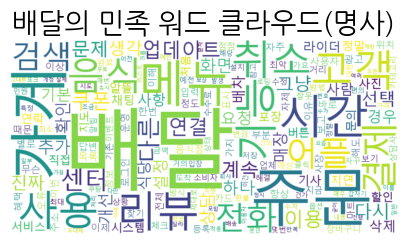

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

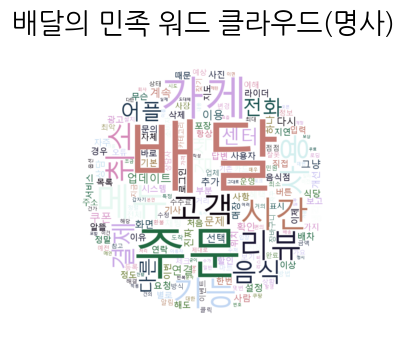

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

mask_img = np.array(Image.open("resources/circle.png"))

wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    colormap="cubehelix",     # color
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

## 4) 미션

In [ ]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm=True, stem=True 옵션 이용
# 명사에서 진행한 정규표현식, 1글자 제외 조건은 동일
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

verb_list = []

for i, review in enumerate(data["댓글"].tolist()) :
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.pos(review, norm=True, stem=True)
    for word, pos in result:
        # 조건2 & 조건3
        if len(word) > 1 and pos == "Verb":
            verb_list.append(word)
    # 내코드
    # temp_list = []
    # for word, pos in result :
    #     if pos == "Verb":
    #         temp_list.append(word)
    # verb_list.extend(temp_list)
# print(word_list2)

['걸리다', '하다', '들어가다', '불다', '하다', '깨다', '나오다', '누르다', '않다', '건지다', '모르다', '기다리다', '먹다', '돼다', '시키다', '깔다', '하다', '하다', '시키다', '먹다', '시키다', '하다', '하다', '바뀌다', '하다', '바뀌다', '밀리다', '만들다', '놓다', '하다', '나가다', '하다', '만들다', '하다', '하다', '하다', '끄다', '바뀌다', '하다', '하다', '이뤄지다', '하다', '하다', '넘다', '남기다', '놓다', '하다', '이르다', '하다', '내다', '바라다', '줄이다', '담다', '올리다', '내리다', '움직이다', '넘어가다', '버리다', '넘어오다', '하다', '두다', '되어다', '올라가다', '되다', '벗어나다', '가다', '쓸다', '누르다', '하다', '되다', '넘다', '하다', '하다', '느끼다', '가다', '되어다', '하다', '하다', '내다', '누르다', '떼다', '하다', '되다', '되다', '넘어가다', '되어다', '하다', '하다', '바꾸다', '해주다', '열다', '되어다', '까먹다', '하다', '바꾸다', '해주다', '먹다', '받다', '보다', '먹다', '가져오다', '만들다', '되다', '되다', '하다', '보이다', '보이다', '하다', '찾다', '찾다', '나오다', '시키다', '먹다', '보다', '시키다', '먹다', '지나다', '하다', '지다', '시키다', '먹다', '보다', '지다', '자다', '하다', '가다', '하다', '하다', '하다', '꺼리다', '지다', '싸다', '오다', '비다', '차다', '해주다', '하다', '나다', '하다', '하다', '늦다', '늦다', '하다', '모르다', '하다', '잡히다', '하다', '해주다', '해주다', '하다', '적다', '들다', '들다', '되다', '되다', '

In [ ]:
counter2 = Counter(verb_list)
print(counter2)
print(counter2.most_common(30))  # 가장 많이 발생한 것 30개

Counter({'하다': 1260, '되다': 319, '시키다': 153, '않다': 144, '받다': 119, '보다': 118, '먹다': 97, '쓰다': 95, '되어다': 78, '오다': 76, '해주다': 75, '자다': 74, '모르다': 65, '뜨다': 57, '나오다': 56, '만들다': 54, '기다리다': 48, '돼다': 48, '걸리다': 46, '싶다': 44, '알다': 43, '들다': 40, '누르다': 39, '가다': 39, '바꾸다': 37, '바뀌다': 36, '찾다': 35, '쓸다': 33, '보이다': 33, '건지다': 31, '넘다': 31, '들어가다': 30, '맞다': 28, '생기다': 27, '주다': 27, '넘어가다': 25, '버리다': 25, '써다': 24, '해보다': 24, '말다': 24, '늦다': 23, '적다': 23, '두다': 21, '남기다': 19, '차다': 19, '이다': 19, '내다': 18, '이르다': 17, '끄다': 16, '나다': 16, '놓다': 15, '지다': 15, '다시다': 15, '늘어나다': 15, '치다': 15, '고치다': 15, '감사하다': 15, '보내다': 15, '올리다': 14, '잡히다': 14, '사라지다': 14, '드리다': 14, '식다': 14, '담다': 13, '지나다': 13, '갈아타다': 13, '막다': 13, '느끼다': 11, '걸다': 11, '남다': 11, '넣다': 11, '떨어지다': 11, '늘리다': 11, '늦어지다': 11, '비다': 10, '없어지다': 10, '고르다': 10, '크다': 10, '지우다': 10, '맞추다': 9, '쉬다': 9, '찾아보다': 9, '서다': 8, '만나다': 8, '없애다': 8, '깔다': 7, '바라다': 7, '내리다': 7, '싸다': 7, '짜다': 7, '켜다': 7, '적히다': 7, '잡다': 7, '살다': 7, '돌아

In [123]:
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower() :
        print(font_name, font_path)

Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
HYGo

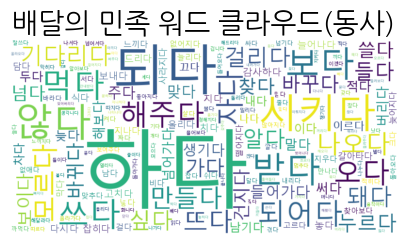

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    # font_path=C":\Windows\Fonts\malgun.ttf",
    font_path="C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter2)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

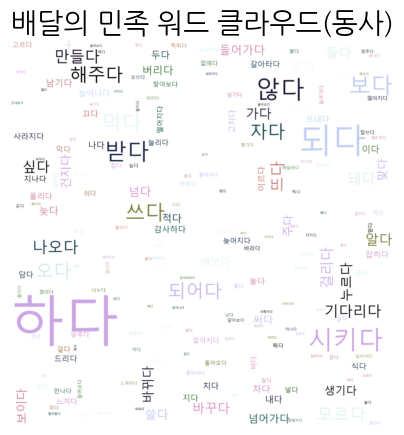

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

mask_img = np.array(Image.open("resources/star.png"))

wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    colormap="cubehelix",     # color
    width=800,
    height=400
)

wc.generate_from_frequencies(counter2)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

## 5) 검색

In [134]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# "취소" 단어가 있는 문장들만 검색
keyword = "취소"

extract_data = data.loc[data["댓글"].str.contains(keyword), :]
extract_data.head()


,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
14,편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워...
27,응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 ...
32,최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필...
33,최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키...


In [136]:
for review in extract_data["댓글"] :
    print(review)
    print("="*100)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워낙 친절한 매장이라 이게 무슨 일이지 하고 전화를 걸어보려 했는데 그 매장이 아니라 편의점 고객센터로 연결되네요? 심지어 주말이라 고객센터는 받지도 않고..ㅠㅠㅠ 계속 기다렸는데.. 곧 나가야 해서 이제 와서 다른 걸 시킬 수도 없고요 바쁠 수도 있고 재고가 없을 수도 있는 거 다 이해하고 평소에 친절하게 대응했던 매장이라 엄청 화는 안 나요 다만 오래 기다렸으니까 취소할 때는 왜 안되는지 정확한 사유를 말해주셨으면 좋겠어요 그리고 편의점에서 부족한 게 있을 때 부분 취소는 안되는 걸까요? 안된다면 이런 점도 개선됐으면 좋겠어요 그래야 서로 편할거같아요
응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 안하면 적어도 취소라도 하게 해야죠. 전화도 안되고 채팅도 안되면 이런 문제상황이 발생했을때 어떻게 대처하려고 그러시나 배민 수준 점점 떨어지는게 보이네요. 앞으로는 이용 안할 생각입니다
최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필요. 고객센터 연결 절대안되고 그냥 고객은 환불도 못받고 무작정 기다려야 함. 주문한 가게에서는 환불하려면 고객이 직접 고객센터 연결해야한다고만 하고.. 그래서 배달시켰는데 제가 포장하는것마냥 직접 걸어갔다왔습니다^^ 할인쿠폰 준다고 절대 사용하지 마세요^^
최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키고 알뜰 배달로도 시켜봐도 이런 일이 가끔 발생하는거 보면 특정 시스템이 아니라 배민 자체의 문제 같은데 

## + Kiwi 형태소 분석기 체험

```
uv add kiwipiepy
```

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
for res, score in kiwi.analyze(text, top_n=5):
    print(score, result, sep="\t")

# konlpy 보다 기능이 훨씬 많음

-65.28563690185547	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('1시간', 'Number'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.0050277709961	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('1시간', 'Number'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.7073745727539	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴

In [140]:
text = "분명 배달이 완료되었는데 나는 받지 않았어"

kiwi = Kiwi()
result = kiwi.tokenize(text)
print(result)   # result 유형 : list

[Token(form='분명', tag='MAG', start=0, len=2), Token(form='배달', tag='NNG', start=3, len=2), Token(form='이', tag='JKS', start=5, len=1), Token(form='완료', tag='NNG', start=7, len=2), Token(form='되', tag='XSV', start=9, len=1), Token(form='었', tag='EP', start=10, len=1), Token(form='는데', tag='EC', start=11, len=2), Token(form='나', tag='NP', start=14, len=1), Token(form='는', tag='JX', start=15, len=1), Token(form='받', tag='VV-R', start=17, len=1), Token(form='지', tag='EC', start=18, len=1), Token(form='않', tag='VX', start=20, len=1), Token(form='었', tag='EP', start=21, len=1), Token(form='어', tag='EF', start=22, len=1)]


In [142]:
for res in result :
    print(res.form, res.tag)

분명 MAG
배달 NNG
이 JKS
완료 NNG
되 XSV
었 EP
는데 EC
나 NP
는 JX
받 VV-R
지 EC
않 VX
었 EP
어 EF


In [143]:
# 명사만 추출
for res in result :
    if res.tag[0] == "N" :
        print(res.form, res.tag)

배달 NNG
완료 NNG
나 NP


# 2. 장바구니 분석

In [145]:
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [150]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
# 빈 리스트 만들기 main_list
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# 반복문으로 형태소 명사 단어들 담기
# sub_list에 명사 단어들 담기
# main_list에 sub_list 담기

main_list = []

for i, review in enumerate(data["댓글"].to_list()) :
    # print(f"{i}번째 리뷰 : {review}")
    # 조건1. 정규표현식을 이용한 전처리 
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기에 넣기 (-> kiwi 사용 혼자해보자)
    result = okt.pos(new_review)
    sub_list =[]
    for word, pos in result :
        if pos == "Noun" and len(word) > 1:
            sub_list.append(word)
    main_list.append(sub_list)

    print(f"{i}번째 리뷰 : {result}")

0번째 리뷰 : [('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adjective'), ('건지', 'Verb'), ('뭔', 'Noun'), ('지는', 'Josa

In [153]:
for temp in main_list :
    print(temp)

['주문', '취소', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '정보', '코로나', '때문', '서버', '취소', '꼼짝']
['음식', '하나', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '다른', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '스탭', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제']
['업데이트', '사용', '점점', '클릭', '한번', '결제', '저쪽', '구석', '마치', '배달', '유도', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '정말', '배민']
['배달', '민족', '자체', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '체적', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '안해']
['장바구니', '마트', '여러가지', '크롤', '살짝', '대각선', '배달', '포장', '용량', '좌우', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '항목', '배달', '포장', '마트', '용량', '항목', '선택', '화면', '필요', '거의', '매일', '배민', 

In [152]:
main_list[0]

['주문',
 '취소',
 '계속',
 '최신',
 '정보',
 '로딩',
 '반복',
 '로딩',
 '이미지',
 '안정',
 '네트워크',
 '상황',
 '새로고침',
 '무한',
 '로딩',
 '심지어',
 '지금',
 '진행중',
 '정보',
 '코로나',
 '때문',
 '서버',
 '취소',
 '꼼짝']

In [154]:
#  main_list = [[리뷰1에 대한 명사 단어들], [리뷰2에 대한 명사 단어들], ...] 형식으로 저장되어야 한다

```
uv add mlxtend
```

In [155]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,가게,가격,가계,가계도,가계부,가기,가까이,가끔,가능,가도,...,횡포,효율,후기,후식,훌쩍,휴가,휴대폰,휴무,휴일,희망
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

    support itemsets
0  0.247826     (가게)
1  0.576087     (배달)
2  0.252174     (배민)
3  0.317391     (주문)


In [159]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


## + 간단 예제로 보기

In [160]:
main_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

In [162]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,국,김치,라면,반찬,밥
0,True,True,False,False,True
1,True,False,False,False,True
2,False,True,False,False,True
3,False,True,True,False,False
4,False,False,False,True,True
5,True,True,False,False,False


In [163]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500000,(국)
1,0.666667,(김치)
2,0.666667,(밥)
3,0.333333,"(국, 김치)"
4,0.333333,"(밥, 국)"
5,0.333333,"(밥, 김치)"


In [164]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(국),(김치),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
1,(김치),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
2,(밥),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
3,(국),(밥),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333


인코딩 : 텍스트에 숫자 부여 (숫자 의미 X)
벡터라이징 : 텍스트를 벡터화(숫자 카운트)
임베딩 : 딥러닝 (학습된 모델)